In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
from pandas import read_csv
import matplotlib.patheffects as pe
from matplotlib.colors import LinearSegmentedColormap

/Users/jimig/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


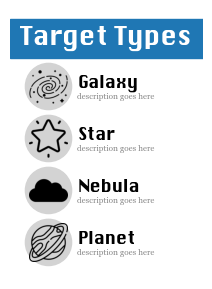

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches((2.5,3.5))

    
# stripe
stripe = plt.Rectangle((0,1150), 1200, 200,color='tab:blue')
ax.add_patch(stripe)

for i,name in enumerate(['galaxy','star','nebula','planet']):
    x,y = 100,(900-(100*i*2.7))
    # Add circle
    circle = plt.Circle((x+100, y+100), 120, color='lightgray', zorder=1)
    ax.add_patch(circle)
    
    # Add Object Icon
    icon1 = Image.open(f'icons/{name}.png').resize((200,200))
    ax.imshow(icon1, extent=(x,x+200,y,y+200),zorder=3)
    
    ax.text(x+250, y+120, name.title(), ha='left', va='center', color='k',
             fontsize=12, font='silom', fontweight='bold')
    
    ax.text(x+250, y+50, 'description goes here', ha='left', va='center', color='#888888',
             fontsize=6, font='Georgia')

    
    

# Title Text
ax.text(500, 1250, 'Target Types', ha='center', va='center', color='white',
             fontsize=18, font='silom', fontweight='bold')



# Additional Formatting
ax.set_xlim(0,1000)
ax.set_ylim(0,1400)
ax.set_axis_off()
plt.axis('off')

plt.savefig(f'final_cards/RULES_target_types.png', bbox_inches='tight', pad_inches=0, dpi=200)
plt.show()
    

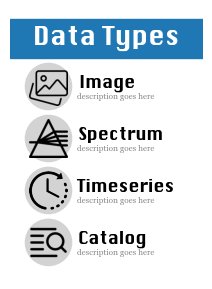

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches((2.5,3.5))

    
# stripe
stripe = plt.Rectangle((0,1150), 1200, 200,color='tab:blue')
ax.add_patch(stripe)

for i,name in enumerate(['image','spectrum','timeseries','catalog']):
    x,y = 100,(900-(100*i*2.7))
    # Add circle
    circle = plt.Circle((x+100, y+100), 120, color='lightgray', zorder=1)
    ax.add_patch(circle)
    
    # Add Object Icon
    icon1 = Image.open(f'icons/{name}.png').resize((200,200))
    ax.imshow(icon1, extent=(x,x+200,y,y+200),zorder=3)
    
    ax.text(x+250, y+120, name.title(), ha='left', va='center', color='k',
             fontsize=12, font='silom', fontweight='bold')
    
    ax.text(x+250, y+50, 'description goes here', ha='left', va='center', color='#888888',
             fontsize=6, font='Georgia')

    
    

# Title Text
ax.text(500, 1250, 'Data Types', ha='center', va='center', color='white',
             fontsize=18, font='silom', fontweight='bold')



# Additional Formatting
ax.set_xlim(0,1000)
ax.set_ylim(0,1400)
ax.set_axis_off()
plt.axis('off')

plt.savefig(f'final_cards/RULES_data_types.png', bbox_inches='tight', pad_inches=0, dpi=200)
plt.show()
    

In [50]:
def make_telescope_card(title, image, wavelength, tel_color):
    '''
    Fucntion to make Observation cards for MAST Match!
    
    Parameters
    ------------
    title: str
        Title for Card, typically name of telescope
    image: str
        File containing image to use for background art
    wavelength: list
       wavelength(s) valid for telescope    
    tel_color:
        accent color for telescope
    '''
    fig, ax = plt.subplots()
    fig.set_size_inches((2.5,3.5))

    
    # Background Image
    img = Image.open(f'telescope_imgs/{image}')
    img = img.resize((1000,1400)) #card size is 2.5 x 3.5 inches
    ax.imshow(img,zorder=0, extent=(0,1000,0,1400))
    # White box to make consistent sizing
    r = plt.Rectangle((0, 0), 1000, 900, color='w',zorder=0)
    ax.add_patch(r)
    
    # Wavelength Box
    if wavelength[0] == 'optical':
        wl_cmap = plt.cm.rainbow
    elif wavelength[0] == 'infrared':
        #wl_cmap = plt.cm.gist_heat
        wl_cmap = LinearSegmentedColormap.from_list("", ['gold','red','darkred','k'])

    elif wavelength[0] == 'ultraviolet':
        wl_cmap = plt.cm.cool
    
    # First box
    plt.imshow([[0.,1], [0.,1]], 
                cmap = wl_cmap, 
                interpolation = 'bicubic',extent=(0,1000,50,250))
    ax.text(500, 150, f'{wavelength[0].title()} Telescope', ha='center', va='center', color='white',
                fontsize=12, font='Georgia', fontweight='bold',zorder=5)
        
    #Second box (if applicable):
    if len(wavelength) ==2:
        if wavelength[1] == 'optical':
            wl_cmap = plt.cm.rainbow
        elif wavelength[1] == 'infrared':
            #wl_cmap = plt.cm.gist_heat
            wl_cmap = LinearSegmentedColormap.from_list("", ['gold','red','darkred','k'])
        elif wavelength[1] == 'ultraviolet':
            wl_cmap = plt.cm.cool
            
        plt.imshow([[0.,1], [0.,1]], 
                   cmap = wl_cmap, 
                   interpolation = 'bicubic',extent=(0,1000,300,500))
        ax.text(500, 400, f'{wavelength[1].title()} Telescope', ha='center', va='center', color='white',
                 fontsize=12, font='Georgia', fontweight='bold',zorder=5)

    
    # Title
    ax.text(50, 850, f'{title}', ha='left', va='top', color='k',
             fontsize=16, font='silom', fontweight='bold')

    
    # flavor test
    #ax.text(50, 150, f'[fun facts or flavor text here]', ha='left', va='top', color='darkgray',
    #         fontsize=10, font='Georgia')

        
    # Add Colored Rectangle
    r = plt.Rectangle((0, 0), 1000, 700, color=tel_color,zorder=1)
    #ax.add_patch(r)
    #ax.text(50, 612, 'Telescope Card', ha='left', va='bottom', color='white',
    #         fontsize=8, font='georgia', fontweight='bold')
            #path_effects=[pe.withStroke(linewidth=4, foreground="k")])

    
    # Additional Formatting
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1400)
    ax.set_axis_off()
    plt.axis('off')

    plt.savefig(f'final_cards/TEL_{image}', bbox_inches='tight', pad_inches=0, dpi=200)
    plt.show()
    

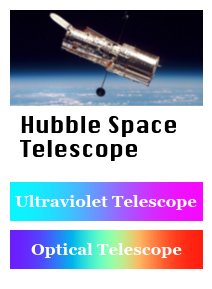

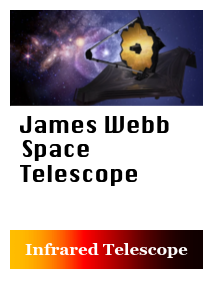

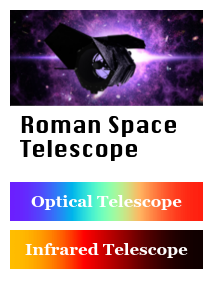

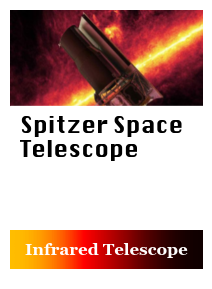

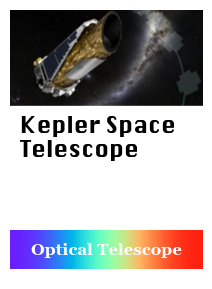

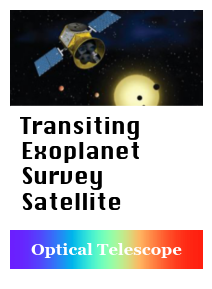

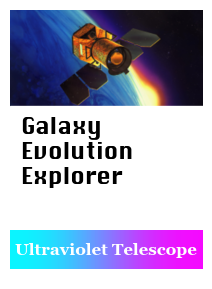

In [51]:
title='Hubble Space\nTelescope'
tel_color='tab:blue'
image='hst.png'
wavelength=['optical', 'ultraviolet']
make_telescope_card(title, image, wavelength, tel_color)


title='James Webb\nSpace\nTelescope'
tel_color='gold'
image='jwst.png'
wavelength=['infrared']
make_telescope_card(title, image, wavelength, tel_color)

title='Roman Space\nTelescope'
tel_color='violet'
image='roman.png'
wavelength=['infrared', 'optical']
make_telescope_card(title, image, wavelength, tel_color)

title='Spitzer Space\nTelescope'
tel_color='blue'
image='spitzer.png'
wavelength=['infrared']
make_telescope_card(title, image, wavelength, tel_color)


title='Kepler Space\nTelescope'
tel_color='blue'
image='kepler.png'
wavelength=['optical']
make_telescope_card(title, image, wavelength, tel_color)

title='Transiting\nExoplanet\nSurvey\nSatellite'
tel_color='blue'
image='tess.png'
wavelength=['optical']
make_telescope_card(title, image, wavelength, tel_color)



title='Galaxy\nEvolution\nExplorer'
tel_color='blue'
image='galex.png'
wavelength=['ultraviolet']
make_telescope_card(title, image, wavelength, tel_color)


